Copyright 2018, Skoltech DeepQauntum Labs, All rights reserved.

# Penalty Functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Create $I,P_0, P_1$ operators

In [37]:
P_0=np.array([[1,0],[0,0]])
P_1=np.array([[0,0],[0,1]])
I=np.array([[1,0],[0,1]])

Check that $P_i^2=P_i$ 

In [4]:
P_0.dot(P_0)

array([[1, 0],
       [0, 0]])

In [5]:
P_1.dot(P_1)

array([[0, 0],
       [0, 1]])

Create $Z$ operator from $P_0, P_1$ and check $Z^2=1$

In [10]:
Z=P_0-P_1
Z.dot(Z)
Z

array([[ 1,  0],
       [ 0, -1]])

Check that $h=\Delta (P_0\otimes P_1+P_1\otimes P_0)$ is a penalty function for logical equivalence

In [16]:
# define h
def h_equivalence(delta):
#     write your code here
    return delta*(np.kron(P_0,P_1)+np.kron(P_1,P_0))

In [17]:
# calculate eigenvalues and corresponding eigenvectors of h_equivalence by using function np.linalg.eig
np.linalg.eig(h_equivalence(0.5))

(array([0. , 0.5, 0.5, 0. ]), array([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]]))

Indeed $|00>$ and $|11>$ is ground states of $h_{=}$

Check that $h=\Delta (P_0\otimes P_0+P_1\otimes P_1)$ is a penalty function for logical non-equivalence

In [19]:
def h_nonequivalence(delta):
#     write your code here
    return delta*(np.kron(P_0,P_0)+np.kron(P_1,P_1))

In [20]:
np.linalg.eig(h_nonequivalence(0.5))

(array([0.5, 0. , 0. , 0.5]), array([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]]))

Indeed $|01>$ and $|10>$ is ground states of $h_{=}$

## Logical AND
The Logical AND operation is constructed similarly to the procedure in previous Examples.  We want to develop a penalty function such that the zero eigenspace is given by $span \{ |x, y, z>| z=x \cdot y\}$ and the orthogonal space $span \{ |x, y, z>| z=1-x \cdot y\}$ corresponds to eigenvalues of at least $\Delta$.  From the truth table 

$x$ | $y$ | $z$ |     $z\stackrel{?}{=}$ $xy$  
--- | --- | --- | ---------------------------
 0  |  0  |  0  |  0                         
 0  |  0  |  1  |  $\ge\Delta$               
 0  |  1  |  0  |  0                         
 0  |  1  |  1  |  $\ge\Delta$               
 1  |  0  |  0  |  0                         
 1  |  0  |  1  |  $\ge\Delta$               
 1  |  1  |  0  |  $\ge\Delta$               
 1  |  1  |  1  |  0     


we arrive at one penalty for each term $\geq \Delta$
\begin{equation}\label{eqn:Hand3}
h_{\wedge}\doteq \Delta(P_{001}+P_{011}+P_{101} + P_{110})
\end{equation}


Check that $h_{\wedge}$ is a penalty function for AND

In [38]:
def h_and(delta):
    return delta*(np.kron(P_0,np.kron(P_0,P_1))+np.kron(P_0,np.kron(P_1,P_1))
                  +np.kron(P_1,np.kron(P_0,P_1))+np.kron(P_1,np.kron(P_1,P_0)))

In [43]:
#  quantum simulator library
import qit
eigenValues, eigenVectors = np.linalg.eig(h_and(1))
idx = np.where(eigenValues == eigenValues.min())
for i in idx[0]:
    print(qit.state(eigenVectors[:,i], dim=tuple([2]*3)))

 +1 |000>
dim: (2, 2, 2) <- (1,)
 +1 |010>
dim: (2, 2, 2) <- (1,)
 +1 |100>
dim: (2, 2, 2) <- (1,)
 +1 |111>
dim: (2, 2, 2) <- (1,)


Indeed $\{|000>\,|010>,|100>,|111>\}$ are the ground states and $\{|001>\,|011>,|101>,|110>\}$ are the excited states

## Two-body interactions
Physical systems with unusual exception implement local (one body) and two-body interactions.  Two body interactions are terms of the form $J_{ij}Z_iZ_j$.   We have so far implemented penalty functions using operators $P_0$, $P_1$.  To translate these directly into physical interactions, we have to return to their defining relations and express them in terms of $Z$ operators.  In doing such, the following problem illustrates that our AND penalty function requires three-body terms to implement.

Express $h_{\wedge}$ over the basis $\big\{{I}, Z, \otimes \big\}$ and check that it is penalty function for AND

In [ ]:
def h_and(delta):
    

For emulation AND penalty on a physical device, it must be brought into two-body form.

The Boolean function for AND operation in two-body interaction form can be written 
\begin{equation}
f_\wedge= ax_3+bx_2x_3+cx_1x_2+dx_1x_3.
\end{equation} 
Hence we arrive to the two-body Hamiltonian for AND  
\begin{equation}\label{eqn:TwobodyAnd}
h_\wedge = aP^{3}_{1}+bP^{2}_{1}\otimes P^{3}_{1}+cP^{1}_{1}\otimes P^{2}_{1}+dP^{1}_{1}\otimes P^{3}_{1}. 
\end{equation}

Derive a series of inequalities (equalities) and find a solution non-negative providing integer values for  $a,b,c,d$ such that $h_\wedge$ has a zero eigenspace given as $span\{|{x_1x_2x_3}>\vert x_3=x_1x_2\}$ and all other eigenspaces are $\geqslant 1$.

In [23]:
def f_and(a,b,c,d):
    h_1=a*np.kron(I,np.kron(I,P_1))
    h_2=b*np.kron(I,np.kron(P_1,P_1))
    h_3=c*np.kron(P_1,np.kron(P_1,I))
    h_4=d*np.kron(P_1,np.kron(I,P_1))
    return h_1+h_2+h_3+h_4    

Develop a two-body penalty function that performs the copy operation. In other words, develop the penalty function such that the low-energy subspace is in $span\{|{000}>, |{111}>\}$.

Substituting the values of the truth table into the variables yields the inequalities, one solution is  $f_\wedge= 3x_3 -2 x_2x_3 +x_1x_2 - 2x_1x_3$. 

In [79]:
def h_and():
    return 3*np.kron(I,np.kron(I,P_1))-2*np.kron(I,np.kron(P_1,P_1))+np.kron(P_1,np.kron(P_1,I))-2*np.kron(P_1,np.kron(I,P_1))

In [80]:
eigenValues, eigenVectors = np.linalg.eig(h_and())
idx = np.where(eigenValues == eigenValues.min())
for i in idx[0]:
    print(qit.state(eigenVectors[:,i], dim=tuple([2]*3)))

 +1 |000>
dim: (2, 2, 2) <- (1,)
 +1 |010>
dim: (2, 2, 2) <- (1,)
 +1 |100>
dim: (2, 2, 2) <- (1,)
 +1 |111>
dim: (2, 2, 2) <- (1,)


# NP problems 

### Minimal Vertex Cover

Let us consider an undirected graph $G=(V,E)$. What is the smallest number of vertices that can be “colored” such that every edge is incident to a colored vertex?

Lets label each vertex $x_i$ with number $1$ if it is colored and $0$ otherwise and consider the following penalty function
\begin{eqnarray}
f&=&H_A+H_B
\\
H_A&=&A\sum_{i,j \in E}(1-x_i)(1-x_j),\quad H_B=B\sum_{i=1}^{n}x_i
\end{eqnarray}

It is enough to choose $B<A$ to ensure that the minimum of this function represents the solution of Miimal Vertex Cover problem since if we uncolor any vertex that ruins the solution, at least one edge will no longer connect
to a colored vertex. So, we can choose $B=\frac{1}{2}$ and $A=1$.


To embed this penalty function to quantum Hamiltonian we apply the following transformation:
$$
x_j\rightarrow P_1^j, \quad 1-x_j\rightarrow P_0^j
$$

And we have the following Hamiltonian:

$$
H=\sum_{i,j \in E}P_0^{i}P_0^{j}+\frac{1}{2}\sum_{i=1}^{n}P_1^i
$$

Lets check that solution of Minimal Vertex Cover problem is encoded in the ground state of the Hamiltonian

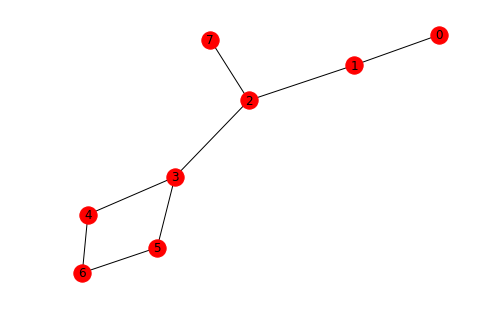

In [134]:
# library for networks
import networkx as nx
edgelist=[(0,1),(1,2),(2,3),(3,4),(4,6),(6,5),(5,3),(2,7)]
G=nx.Graph(edgelist)
nx.draw(G, with_labels=True)

In [135]:
# interaction terms for H_ Hamiltonian
def OnEdgeTerms(operator ,edge, N):
    if edge[0]<edge[1]:
        m,n=edge[0], edge[1]
    else:
        n,m=edge[0], edge[1]
        
    h=operator   
    for i in range(m):
        h=np.kron(I,h)
    for i in range(m+1, n):
        h=np.kron(h,I)
    h=np.kron(h,operator)
    for i in range(n+1, N):
        h=np.kron(h,I)
    
    return h

In [136]:
#on-site terms for H_B Hamiltonian
def OnSiteTerms(operator, n, N):
    h=operator
    for i in range(n):
        h=np.kron(I,h)
    for i in range(n+1, N):
        h=np.kron(h,I)
    
    return 0.5*h

In [137]:
# function transforms Graph to Hamiltonian
def FromGraphToHamiltonian(graph):
    N=graph.number_of_nodes()
    
    # on-site terms
    h=OnSiteTerms(P_1, 0, N)
    for n in range(1, N):
        h+=OnSiteTerms(P_1, n, N)
    
    # interaction terms
    for edge in graph.edges:
        h+=OnEdgeTerms(P_0, edge, N)
    
    return h

In [138]:
# quantum simulator library
import qit
index_min=np.argmin(np.linalg.eig(FromGraphToHamiltonian(G))[0])
qit.state(np.linalg.eig(FromGraphToHamiltonian(G))[1][index_min], dim=tuple([2]*8))

 +1 |01010011> ...
dim: (2, 2, 2, 2, 2, 2, 2, 2) <- (1,)

So Minimal Vertex configuration is {1,3,6,7} and consists of 4 verticies

### Graph partitioning

Let us consider an undirected graph $G=(V,E)$ with an even number of verticies $N$. What is a partition of graph verticies into two subsets of equal size $N/2$ such that the number of edges connecting this subsets is minimized?

Lets place a number $s_i$ +1 or -1 (an Ising spin) on each vertex $i\in V$ of the graph such that the sign of vetrex will denote the vertex subset $+$ or $-$. Consider the following penalty function
\begin{eqnarray}
f&=&H_A+H_B
\\
H_A&=&A(\sum_{i=1}^{n}s_i)^2, \quad H_B=B(\sum_{i,j \in E}\frac{1-s_is_j}{2})
\end{eqnarray}

The first term provides a penalty if the number of elements in the $+$ set is not equal to the $-$ set. Note that this penalty function is symmetric under transfomation $s_i\rightarrow -s_i$.  Let $B>0$ and since we wish to minimize the number of edges between two subsets this function penalize for every edge between the subsets. To ensure that the ground state of the Hamiltonian divide verticies on two equal subsets we should obtain relation between $A$ and $B$ which is still unclear. 
Suppose that there is a configuration such that number of verticies in two sets are different. If we change sign of one vertice of the larger set then chang
$$
\Delta H = \Delta H_A+\Delta H_B,\quad \Delta H_A=-4A,\quad \Delta H_B\leq dB,
$$
where $d$ is a maximal degree of graph. To ensure that the minimum of the penalty function divides the graph verticies in two equal sets we wish $\Delta H<0$ and we have
$$
\frac{A}{B}>\frac{d}{4}
$$


**Problem**. Find the solution of the graph partitioning problem for the graph $G$ from the previous problem as the ground state of corresponding Hamiltonian.

Hint: Note that $s_i=1-2x_i$ from the previous problem. Rewrite the penalty function in terms of $x_i$ and to embed it to quantum Hamiltonian use the same transformation as for the previous problem



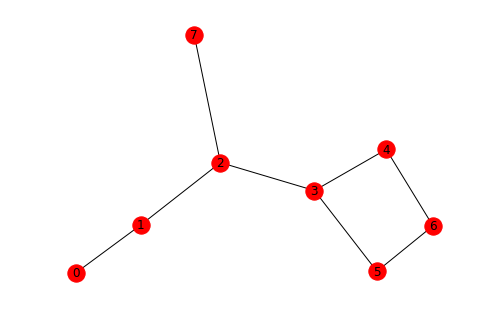

In [85]:
import networkx as nx
edgelist=[(0,1),(1,2),(2,3),(3,4),(4,6),(6,5),(5,3),(2,7)]
G=nx.Graph(edgelist)
# pos=nx.spring_layout(G) 
nx.draw(G, with_labels=True)

In this case the graph partitioning is obvious: {0,1,2,7} and {3,4,5,6}. Let's check that quantum embeddings works

Embed the penalty function into quantum Hamiltonian as

In [141]:
def H_A(graph, A=1):
    N=graph.number_of_nodes()
    
    h=OnSiteTerms(Z, 0, N)
    for n in range(1, N):
        h+=OnSiteTerms(Z, n, N)
    
    return A*h.dot(h)


# interaction terms for H_B Hamiltonian
def H_int(edge, N):
    if edge[0]<edge[1]:
        m,n=edge[0], edge[1]
    else:
        n,m=edge[0], edge[1]
    
    ZZ=Z.copy()
    for i in range(m):
        ZZ=np.kron(I,ZZ)
    for i in range(m+1, n):
        ZZ=np.kron(ZZ,I)
    ZZ=np.kron(ZZ,Z)
    for i in range(n+1, N):
        ZZ=np.kron(ZZ,I)
    
    II=I.copy()
    for i in range(1,N):
        II=np.kron(I,II)
    return (II-ZZ)/2


def FromGraphToHamiltonian(graph):
    N=graph.number_of_nodes()
    
    H=H_A(graph)
    # interaction terms
    for edge in graph.edges:
        H+=H_int(edge,N)
    
    return H

Find the ground state and consequently the graph partitioning

In [145]:
H=FromGraphToHamiltonian(G)
index_min=np.argmin(np.linalg.eig(H)[0])
qit.state(np.linalg.eig(FromGraphToHamiltonian(G))[1][index_min], dim=tuple([2]*8))

 +1 |00011110> ...
dim: (2, 2, 2, 2, 2, 2, 2, 2) <- (1,)

Thus graph partitionong is $\{0,1,2,7\}$ and $\{3,4,5,6\}$

Create a new graph up to 8 verticies and find the graph partitioning by using the same procedure 

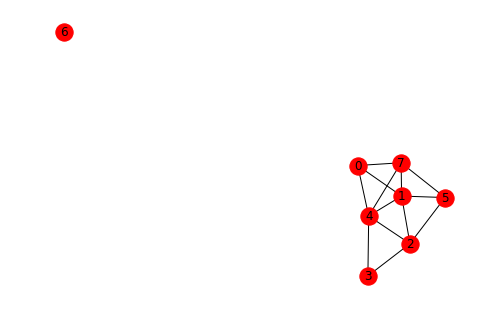

In [147]:
# Create a random graph with 8 nodes
G=nx.gnp_random_graph(8, 0.3)
nx.draw(G, with_labels=True)

In [148]:
# Find the solution
H=FromGraphToHamiltonian(G)
index_min=np.argmin(np.linalg.eig(H)[0])
qit.state(np.linalg.eig(FromGraphToHamiltonian(G))[1][index_min], dim=tuple([2]*8))

 +1 |00110010> ...
dim: (2, 2, 2, 2, 2, 2, 2, 2) <- (1,)

# References

* Stephen A. Cook. The complexity of theorem-proving procedures. In Proceedings of the Third
Annual ACM Symposium on Theory of Computing, STOC ’71, pages 151–158, New York, NY,
USA, 1971. ACM.

* J. D. Biamonte. Nonperturbative k -body to two-body commuting conversion Hamiltonians and
embedding problem instances into Ising spins. Physical Review A, 77(5):052331, May 2008.

* J. D. Whitfield, M. Faccin, and J. D. Biamonte. Ground-state spin logic. EPL (Europhysics
Letters), 99:57004, September 2012.

* Lucas, Andrew. "Ising formulations of many NP problems." Frontiers in Physics 2 (2014): 5.
